---

<center> <h1> <span style='color:#8A2BE2'> CREWES Data Science Training </span> </h1> </center>

<center> <h2> <span style='color:#7FFFD4'> Restaurant Revenue Prediction  </span> </h2> </center>

---

In this [Jupyter Notebook](https://jupyter.org/install) we will analyze [Restaurant Revenue Prediction](https://www.kaggle.com/code/akouaorsot/restaurant-revenue-s-predictions)

## Predicting annual restaurant sales based on objective measurements

TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 

### Data fields

* **Id** : Restaurant id. 
* **Open Date** : opening date for a restaurant
* **City** : City that the restaurant is in. Note that there are unicode in the names. 
* **City Group**: Type of the city. Big cities, or Other. 
* **Type**: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* **P1, P2 - P37**: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
* **Revenue**: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

#### Loading Data

In [1]:
#Warning and deprecated messages

import warnings
warnings.filterwarnings("ignore")

#Core

import numpy as np
import pandas as pd

#Visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading Files

In [2]:
test = pd.read_csv("test.csv.zip")
test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0


In [3]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [4]:
print(test.shape)

(100000, 42)


In [5]:
train = pd.read_csv("train.csv.zip")
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [6]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [7]:
print(train.shape)

(137, 43)


#### Checking data types

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

#### Converting date (Object) to date type

In [10]:
test["Open Date"] = pd.to_datetime(test["Open Date"], format = "%m/%d/%Y")
train["Open Date"] = pd.to_datetime(train["Open Date"], format = "%m/%d/%Y")

In [11]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [12]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Id          100000 non-null  int64         
 1   Open Date   100000 non-null  datetime64[ns]
 2   City        100000 non-null  object        
 3   City Group  100000 non-null  object        
 4   Type        100000 non-null  object        
 5   P1          100000 non-null  int64         
 6   P2          100000 non-null  float64       
 7   P3          100000 non-null  float64       
 8   P4          100000 non-null  float64       
 9   P5          100000 non-null  int64         
 10  P6          100000 non-null  int64         
 11  P7          100000 non-null  int64         
 12  P8          100000 non-null  int64         
 13  P9          100000 non-null  int64         
 14  P10         100000 non-null  int64         
 15  P11         100000 non-null  int64         
 16  P12

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id          137 non-null    int64         
 1   Open Date   137 non-null    datetime64[ns]
 2   City        137 non-null    object        
 3   City Group  137 non-null    object        
 4   Type        137 non-null    object        
 5   P1          137 non-null    int64         
 6   P2          137 non-null    float64       
 7   P3          137 non-null    float64       
 8   P4          137 non-null    float64       
 9   P5          137 non-null    int64         
 10  P6          137 non-null    int64         
 11  P7          137 non-null    int64         
 12  P8          137 non-null    int64         
 13  P9          137 non-null    int64         
 14  P10         137 non-null    int64         
 15  P11         137 non-null    int64         
 16  P12         137 non-null  

#### Checking for dulicates rows

In [15]:
test.duplicated().sum()

0

In [16]:
train.duplicated().sum()

0

#### Checking for missing values

In [17]:
test.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [18]:
train.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

#### Statistical Description

In [19]:
test.describe().T # Statistics of numerical columns

,count,mean,std,min,25%,50%,75%,max
Id,100000.0,49999.500000,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
P1,100000.0,4.088030,2.812963,1.0,2.00,3.0,4.00,15.0
P2,100000.0,4.428085,1.428865,1.0,3.75,5.0,5.00,7.5
P3,100000.0,4.215325,0.842161,0.0,4.00,4.0,4.00,6.0
P4,100000.0,4.396025,1.035827,2.0,4.00,4.0,5.00,7.5
P5,100000.0,1.989590,1.065314,1.0,1.00,2.0,2.00,6.0
P6,100000.0,2.881900,1.531429,1.0,2.00,2.0,4.00,10.0
P7,100000.0,5.300510,2.178580,1.0,5.00,5.0,5.00,10.0
P8,100000.0,4.931000,1.718490,1.0,4.00,5.0,5.00,10.0
P9,100000.0,5.251380,1.702632,4.0,4.00,5.0,5.00,10.0


In [20]:
test.describe(include = "object").T # Statistics of the categorical (object) column

,count,unique,top,freq
City,100000,57,İstanbul,34087
City Group,100000,2,Other,50728
Type,100000,4,FC,57019


In [21]:
test.describe(include = "all").T # Numeric and categoric columns

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Id,100000.0,NaN,NaN,NaN,NaT,NaT,49999.5,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
Open Date,100000,310,2013-07-10 00:00:00,645,1995-05-08,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,100000,57,İstanbul,34087,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City Group,100000,2,Other,50728,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,100000,4,FC,57019,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1,100000.0,NaN,NaN,NaN,NaT,NaT,4.08803,2.812963,1.0,2.0,3.0,4.0,15.0
P2,100000.0,NaN,NaN,NaN,NaT,NaT,4.428085,1.428865,1.0,3.75,5.0,5.0,7.5
P3,100000.0,NaN,NaN,NaN,NaT,NaT,4.215325,0.842161,0.0,4.0,4.0,4.0,6.0
P4,100000.0,NaN,NaN,NaN,NaT,NaT,4.396025,1.035827,2.0,4.0,4.0,5.0,7.5
P5,100000.0,NaN,NaN,NaN,NaT,NaT,1.98959,1.065314,1.0,1.0,2.0,2.0,6.0


* Data goes from 1995-05-08 to 2014-01-04
* Istanbul appears with the most frequency although the city group "other" is the most frequent.

In [22]:
train.describe().T 

,count,mean,std,min,25%,50%,75%,max
Id,137.0,6.800000e+01,3.969257e+01,0.0,34.0,68.0,102.0,136.0
P1,137.0,4.014599e+00,2.910391e+00,1.0,2.0,3.0,4.0,12.0
P2,137.0,4.408759e+00,1.514900e+00,1.0,4.0,5.0,5.0,7.5
P3,137.0,4.317518e+00,1.032337e+00,0.0,4.0,4.0,5.0,7.5
P4,137.0,4.372263e+00,1.016462e+00,3.0,4.0,4.0,5.0,7.5
P5,137.0,2.007299e+00,1.209620e+00,1.0,1.0,2.0,2.0,8.0
P6,137.0,3.357664e+00,2.134235e+00,1.0,2.0,3.0,4.0,10.0
P7,137.0,5.423358e+00,2.296809e+00,1.0,5.0,5.0,5.0,10.0
P8,137.0,5.153285e+00,1.858567e+00,1.0,4.0,5.0,5.0,10.0
P9,137.0,5.445255e+00,1.834793e+00,4.0,4.0,5.0,5.0,10.0


In [23]:
train.describe(include = "object").T

,count,unique,top,freq
City,137,34,İstanbul,50
City Group,137,2,Big Cities,78
Type,137,3,FC,76


In [24]:
train.describe(include = "all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Id,137.0,NaN,NaN,NaN,NaT,NaT,68.0,39.692569,0.0,34.0,68.0,102.0,136.0
Open Date,137,134,2010-02-23 00:00:00,2,1996-05-08,2014-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,137,34,İstanbul,50,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City Group,137,2,Big Cities,78,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,137,3,FC,76,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1,137.0,NaN,NaN,NaN,NaT,NaT,4.014599,2.910391,1.0,2.0,3.0,4.0,12.0
P2,137.0,NaN,NaN,NaN,NaT,NaT,4.408759,1.5149,1.0,4.0,5.0,5.0,7.5
P3,137.0,NaN,NaN,NaN,NaT,NaT,4.317518,1.032337,0.0,4.0,4.0,5.0,7.5
P4,137.0,NaN,NaN,NaN,NaT,NaT,4.372263,1.016462,3.0,4.0,4.0,5.0,7.5
P5,137.0,NaN,NaN,NaN,NaT,NaT,2.007299,1.20962,1.0,1.0,2.0,2.0,8.0


* Data goes from 1996-05-08 to 2014-01-25
* Istanbul appears with the most frequency and also the city group "Big cities".

#### Merging data frames

In [25]:
data = test.merge(train, how = "outer")
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,NaN
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,NaN
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,NaN
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,NaN
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
100133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
100134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
100135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


# EDA

### Univariate Analysis

In [31]:
def hist_box(data, feature, figsize=(12, 7)):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (0.25, 0.75)}, figsize = figsize)

    # Boxplot on top
    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color = "pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    # Histogram on bottom
    sns.histplot(data = data, x = feature, ax = ax_hist) 

    # Add mean and median to histogram
    ax_hist.axvline(data[feature].mean(), color = "green") # mean
    ax_hist.axvline(data[feature].median(), color = "orange") # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)   

In [32]:
# Get numerical columns:
cols_num = list(data.select_dtypes(include = ["int64", "float64"]))

print(cols_num)

['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']


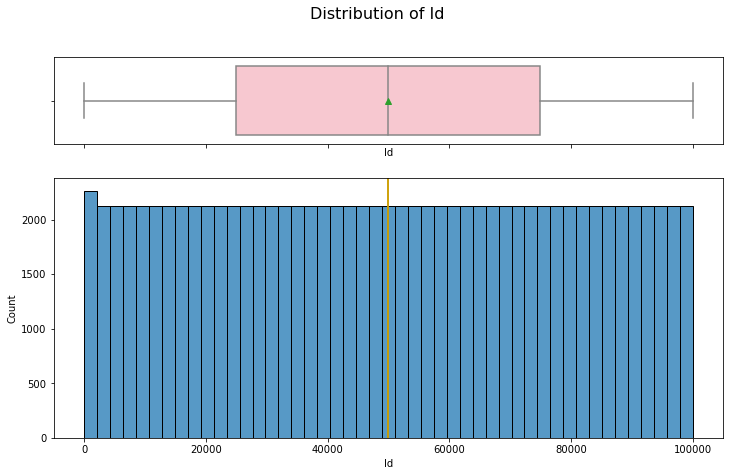

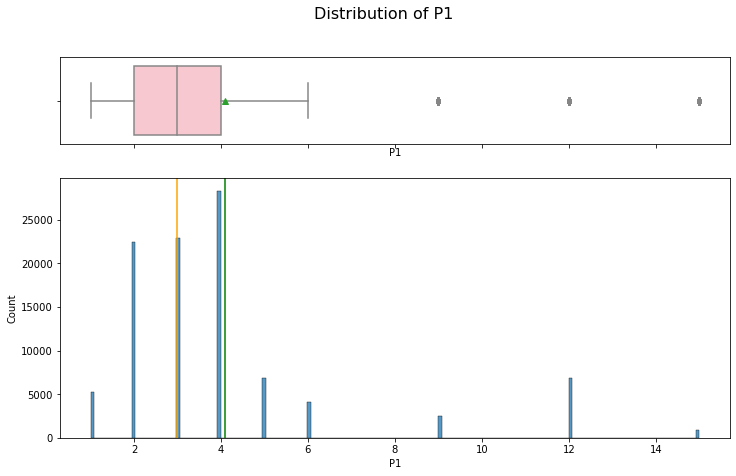

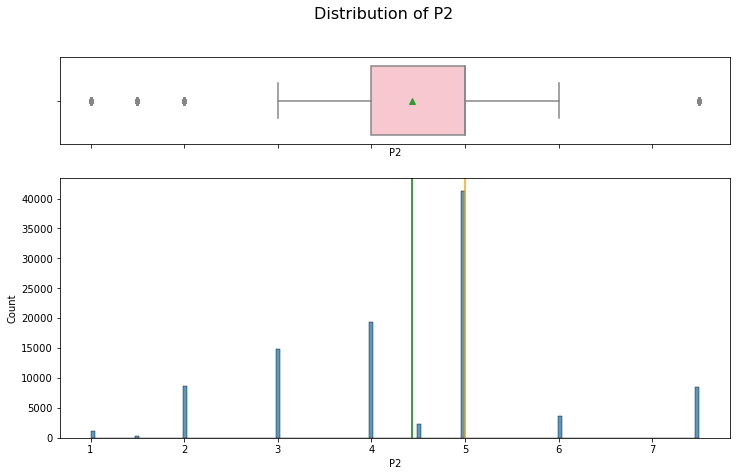

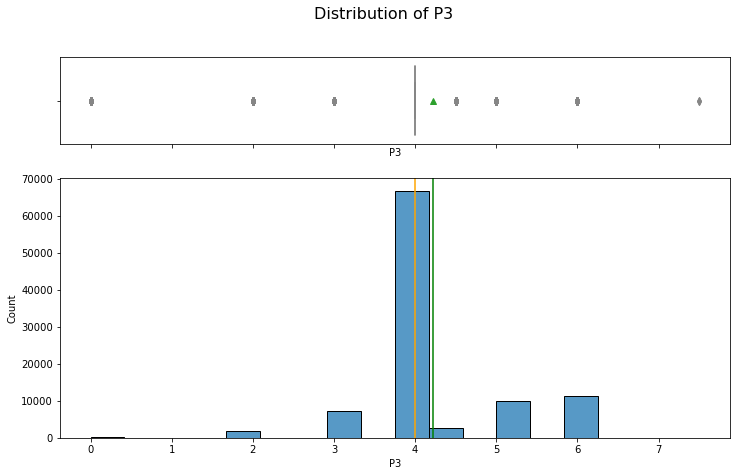

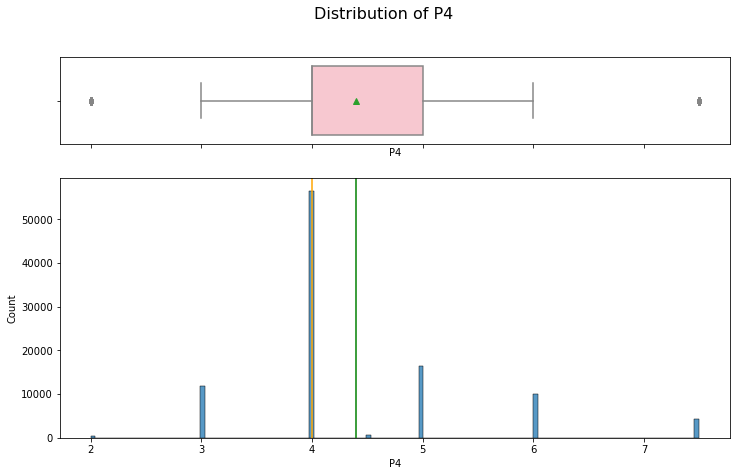

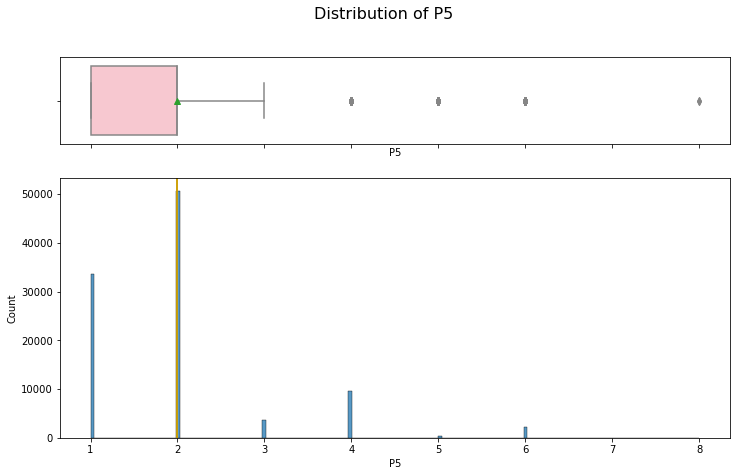

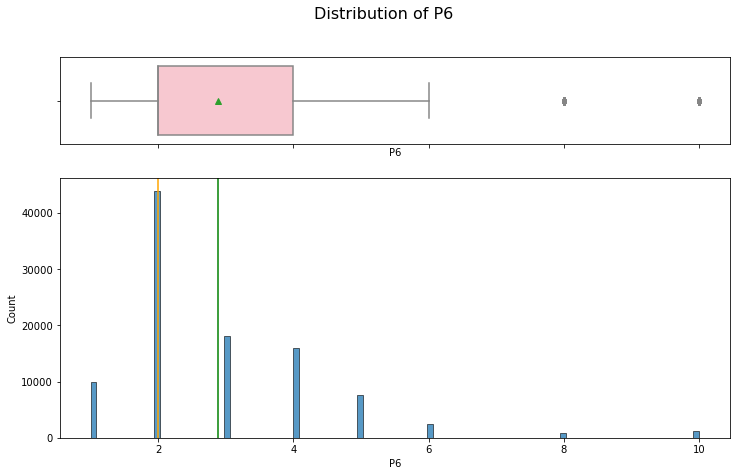

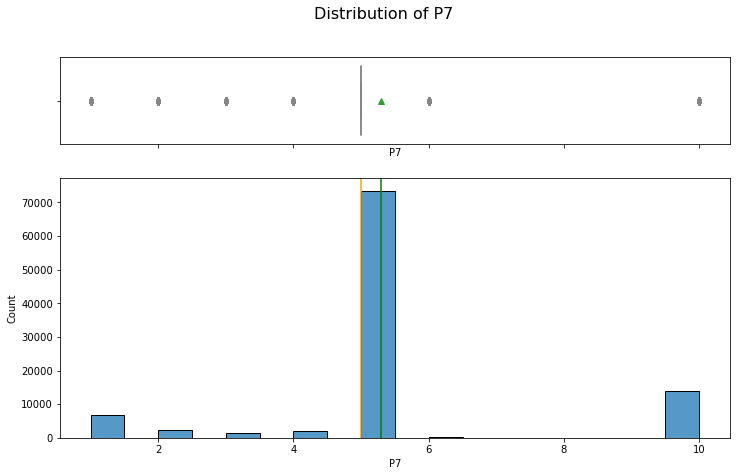

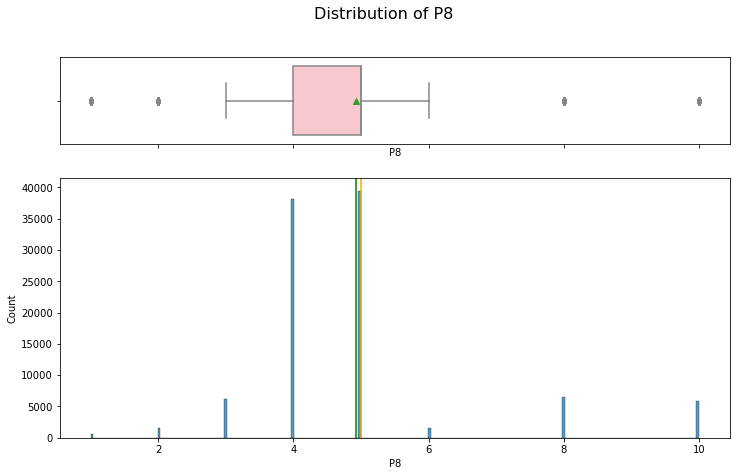

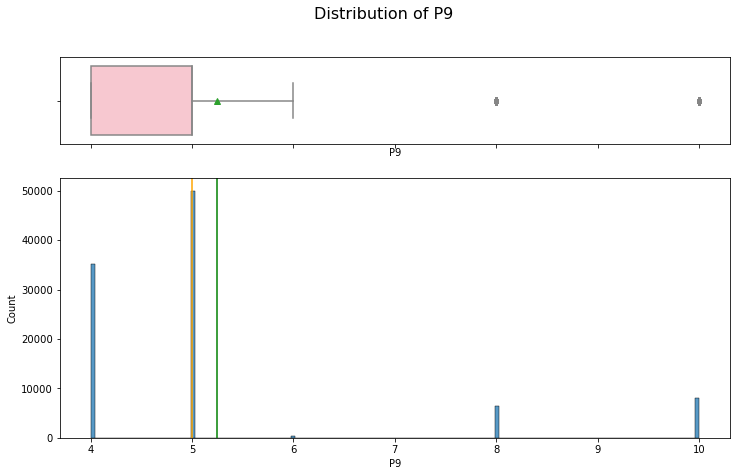

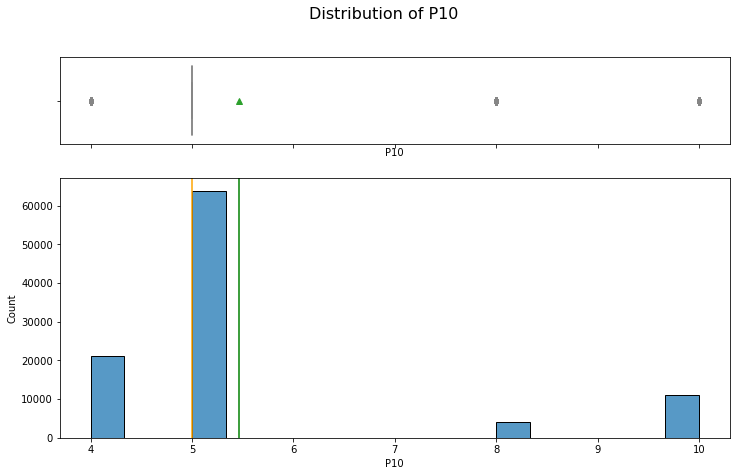

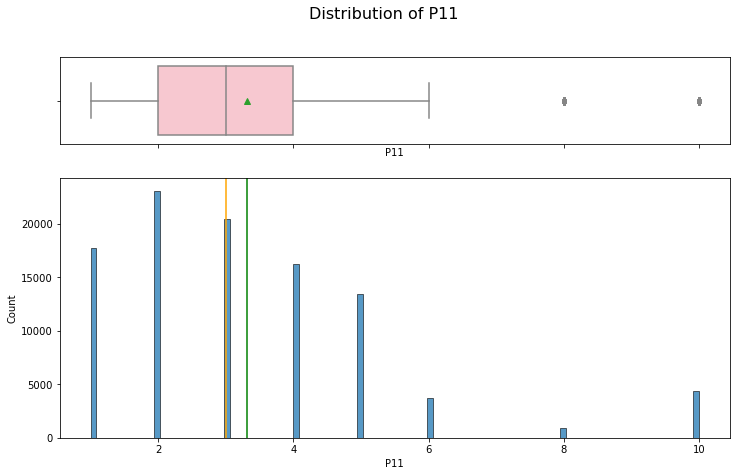

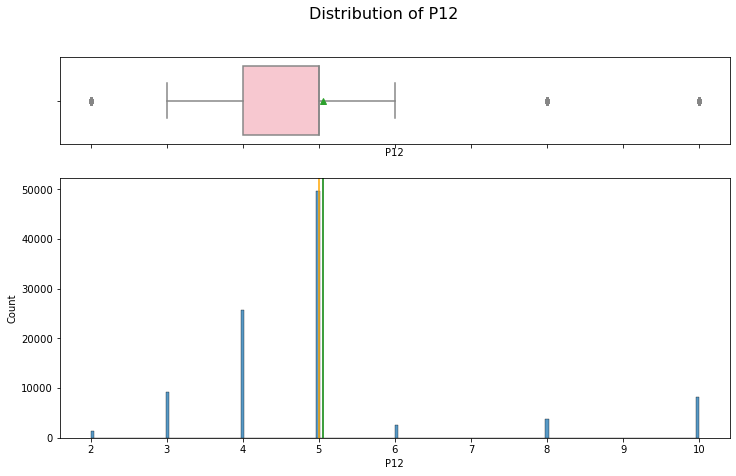

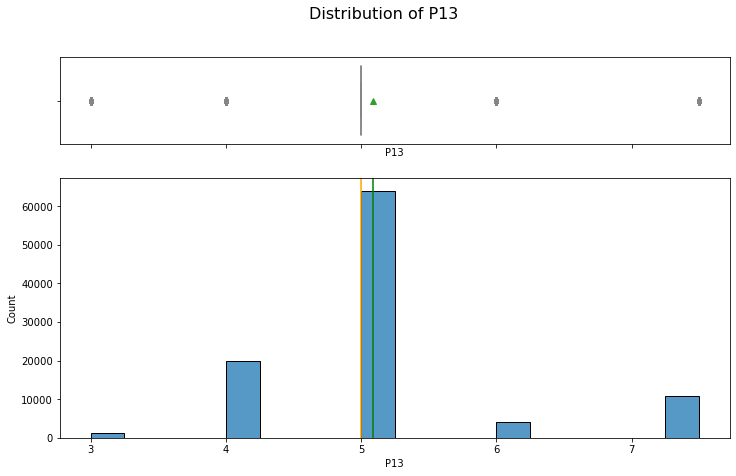

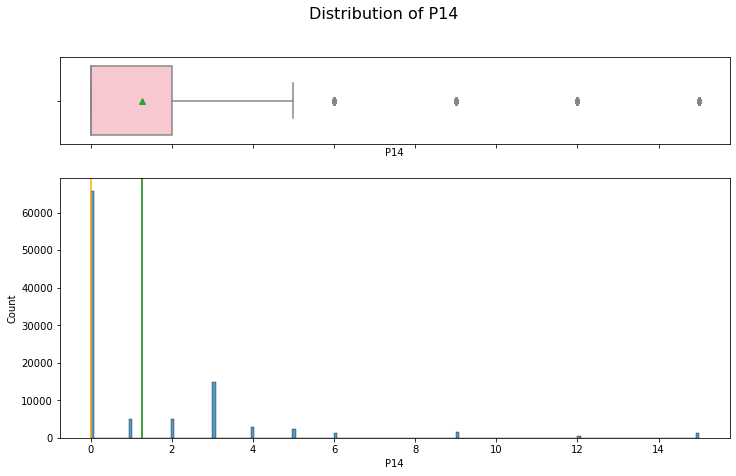

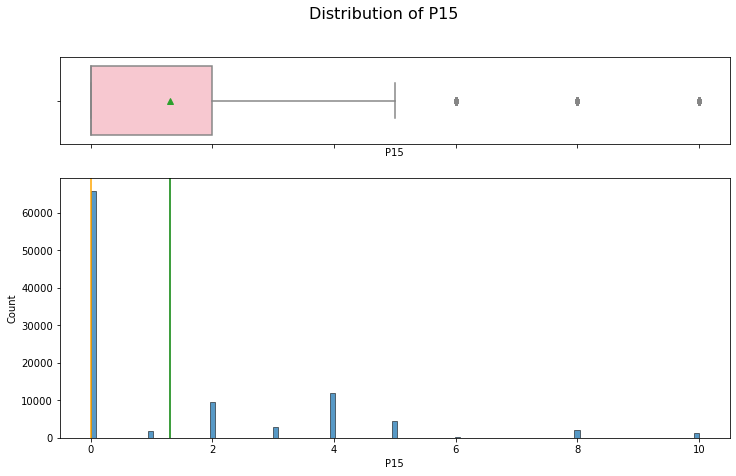

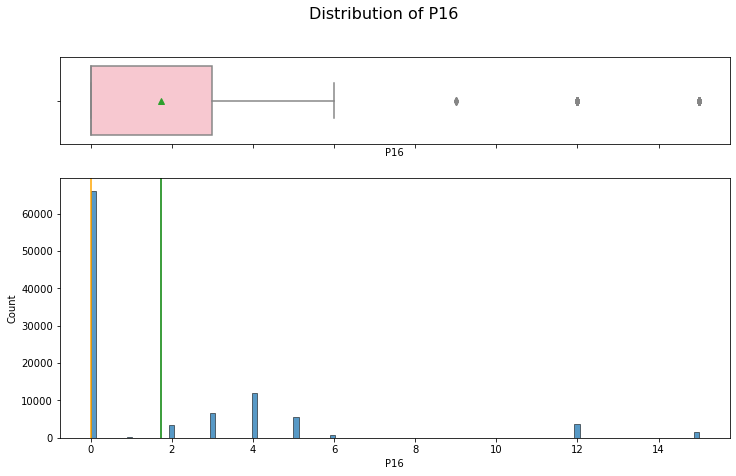

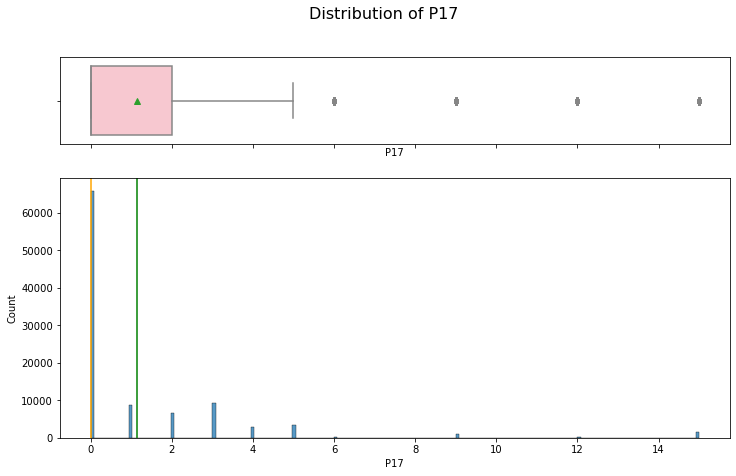

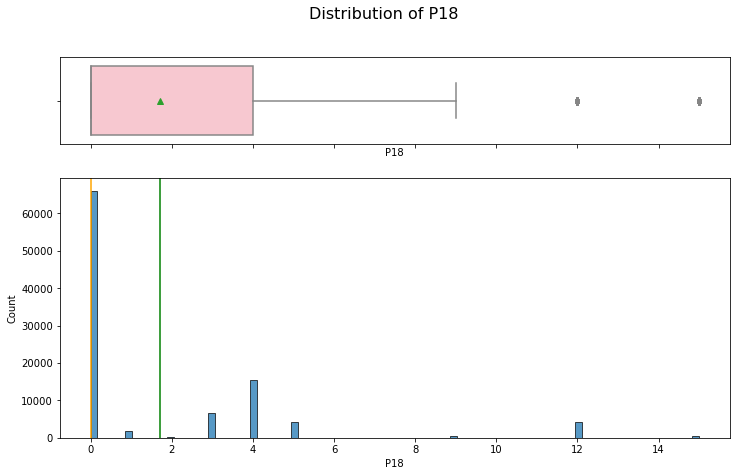

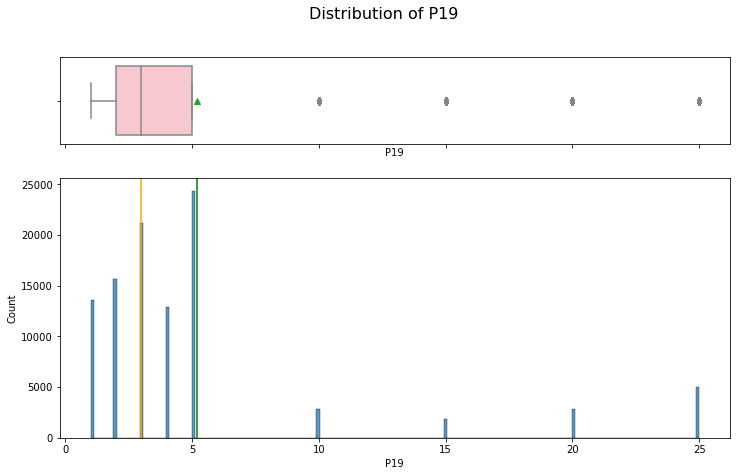

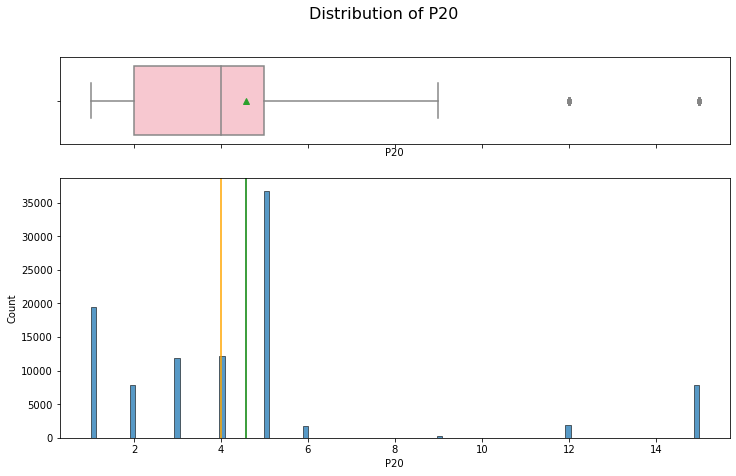

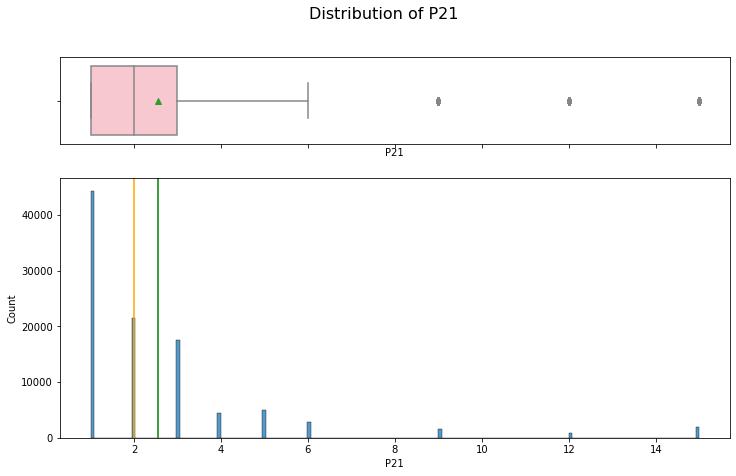

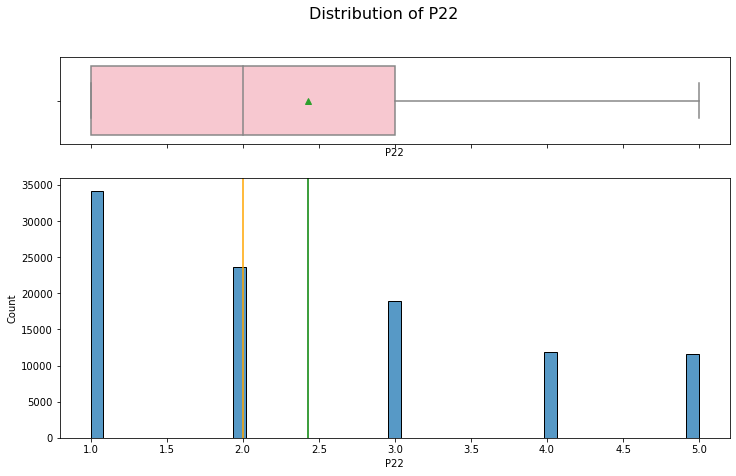

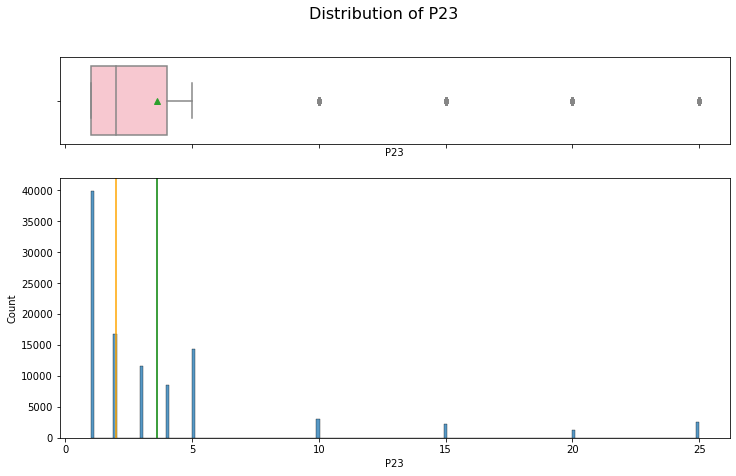

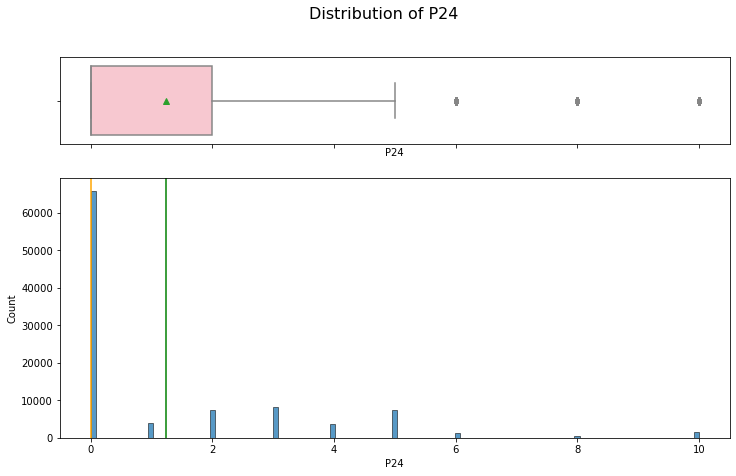

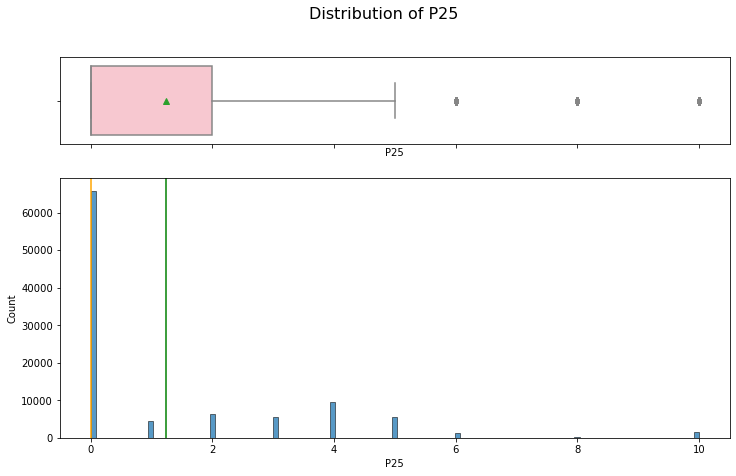

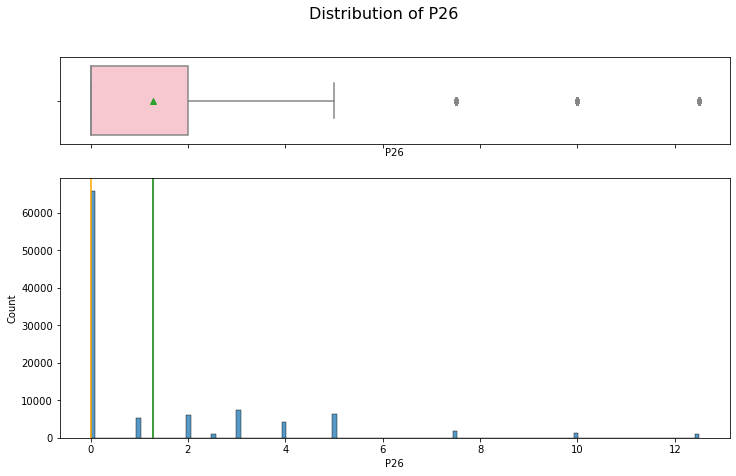

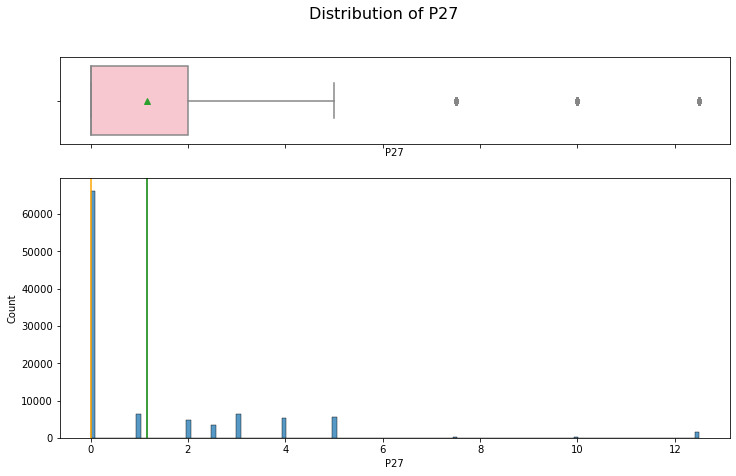

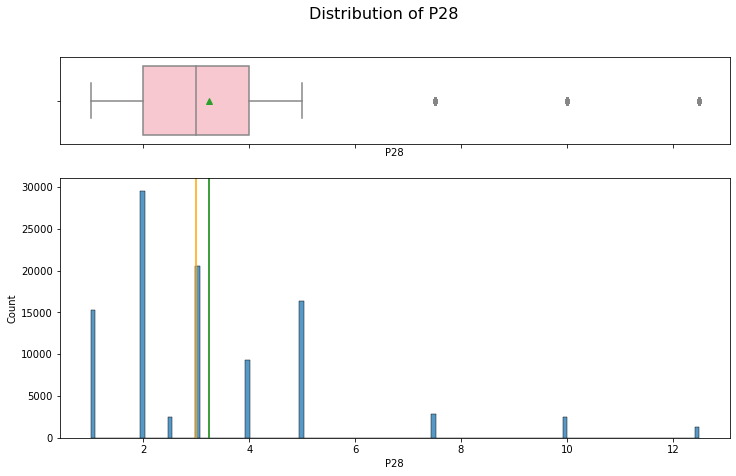

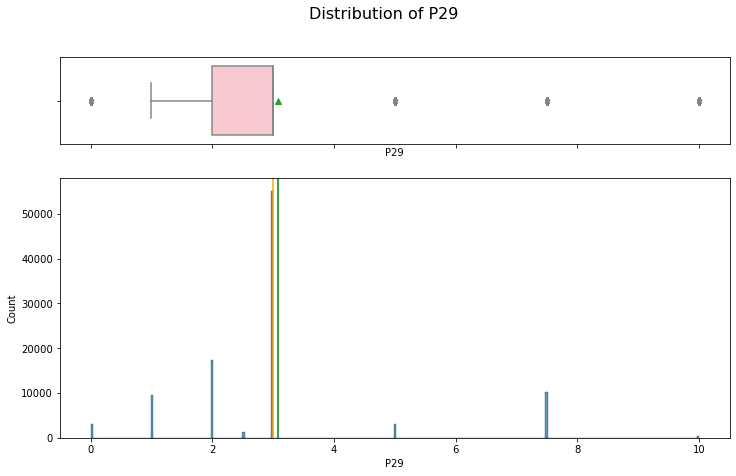

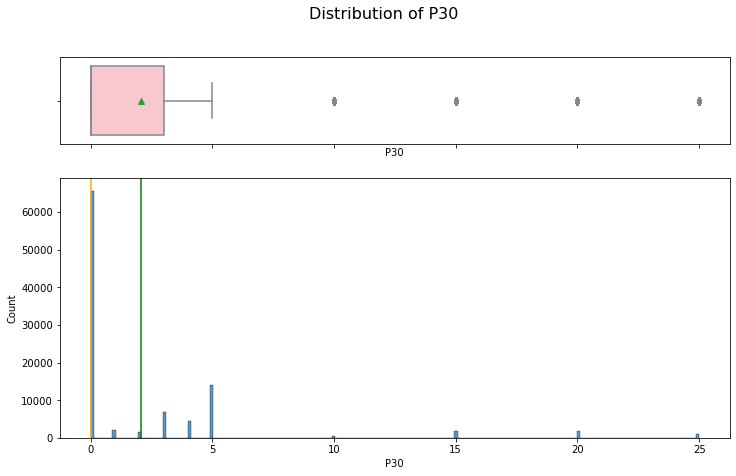

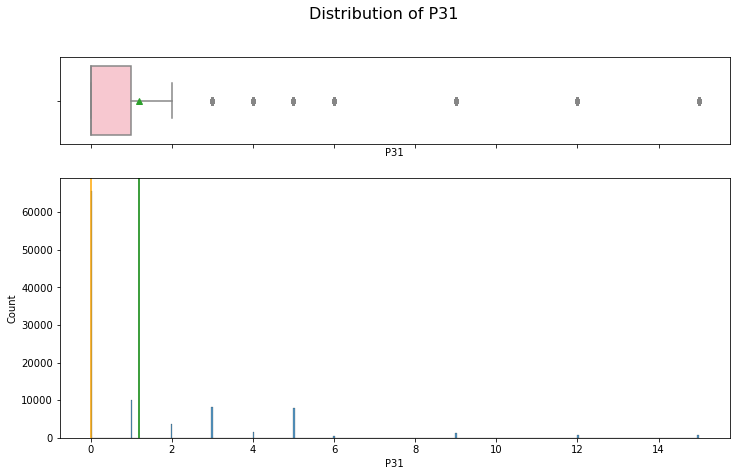

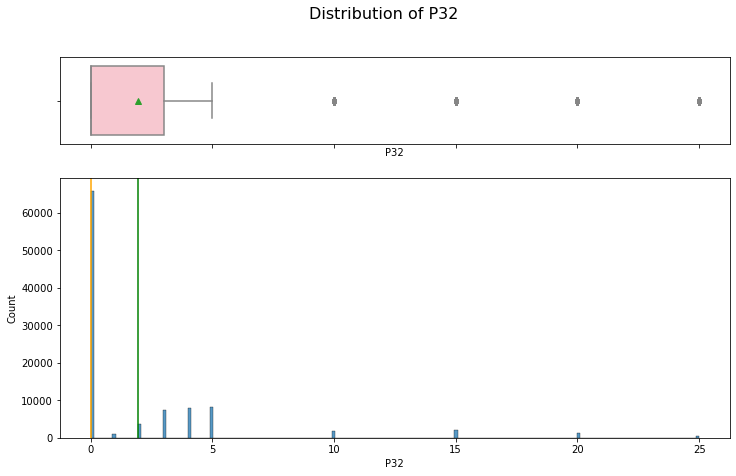

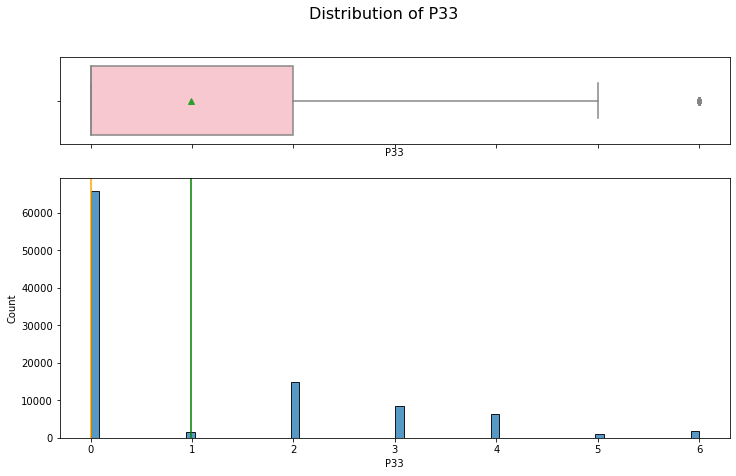

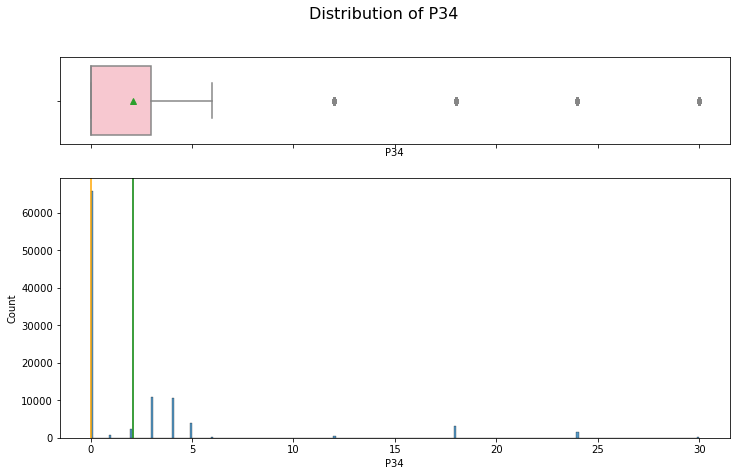

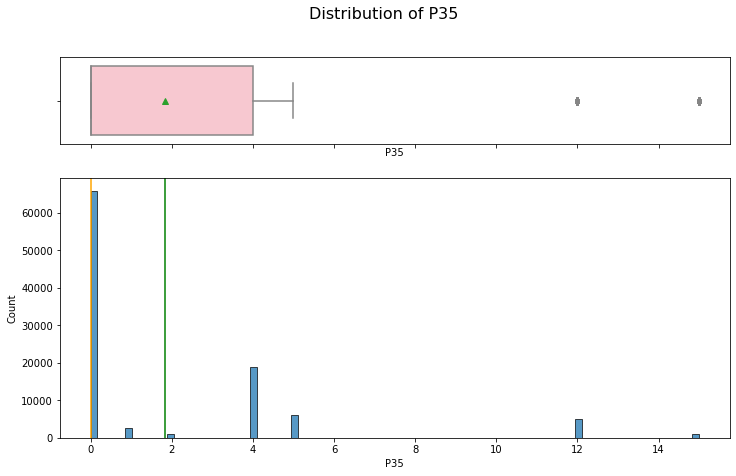

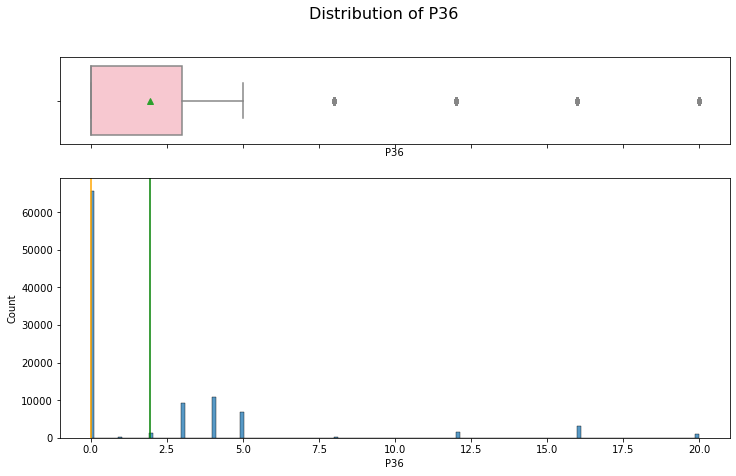

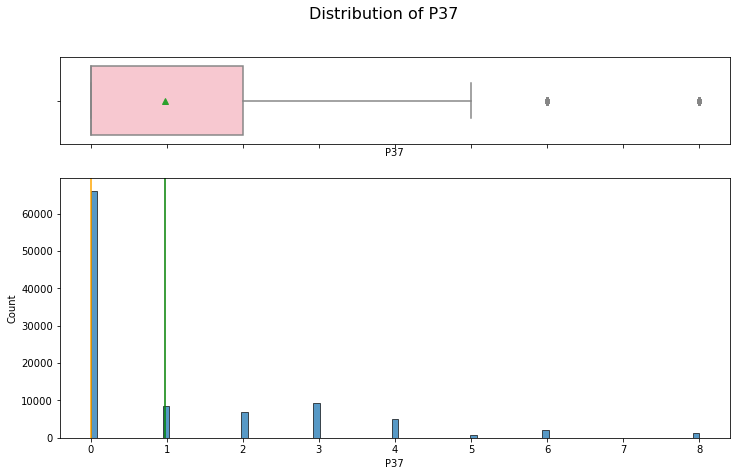

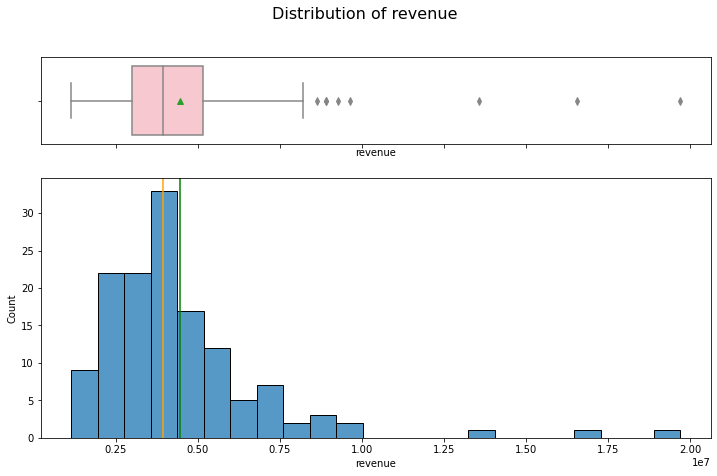

In [34]:
for i in cols_num:
    hist_box(data, i)

* `revenue` has a normal distribution on general.

### Categorical Features

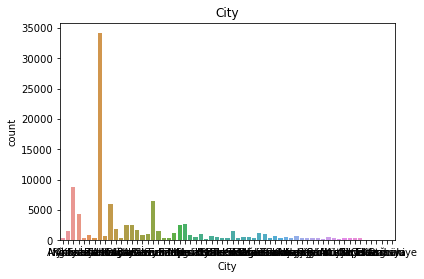

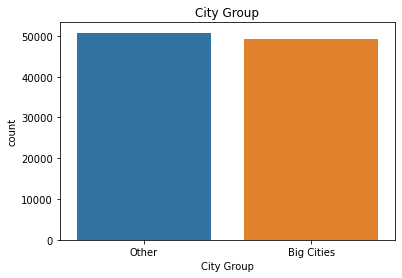

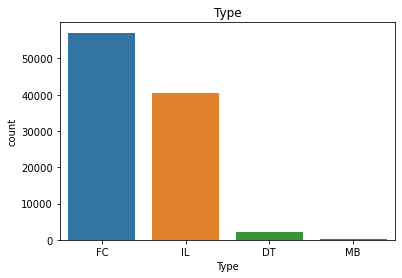

In [44]:
cols_cat = ["City", "City Group", "Type"]

for i in cols_cat:
    sns.countplot(data = data, x = i);
    plt.title(i)
    plt.show()

* For the 'City' we can see a big outlier.
* If you check for the Group, you can see the distrution is similar when you group big cities and others.
* The distribution is bigger for Food Court and inline restaurantes.

#### Numerical vs Revenue

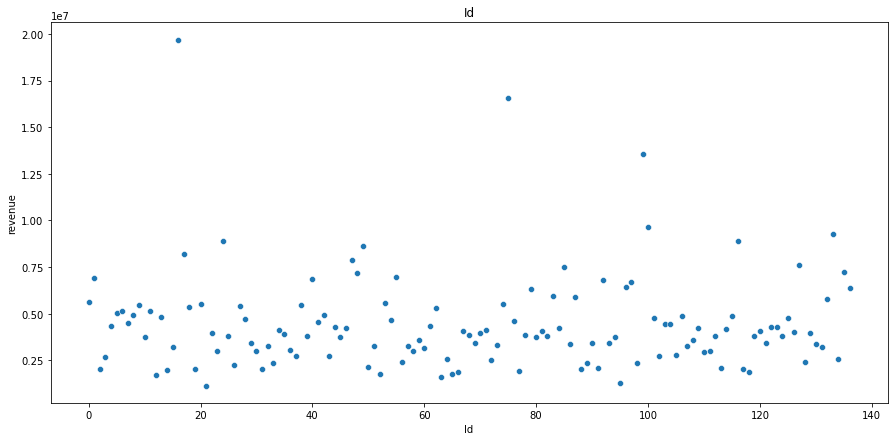

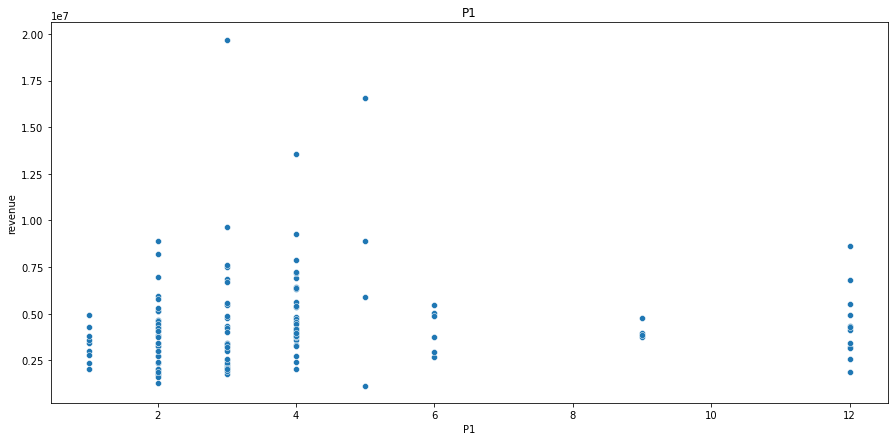

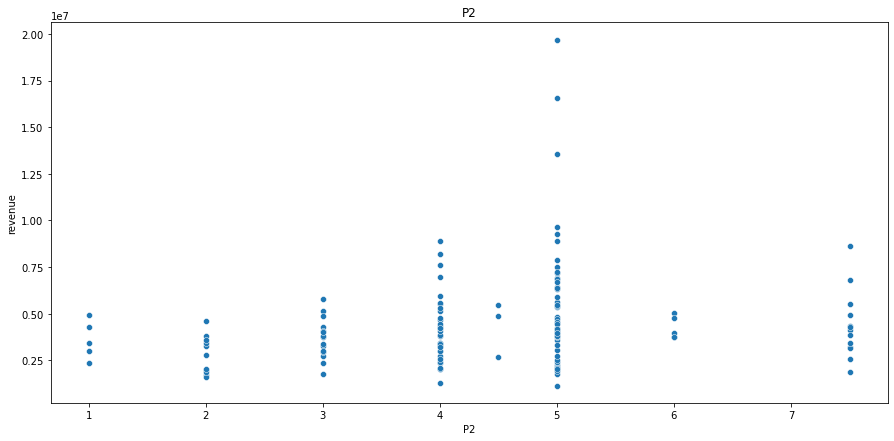

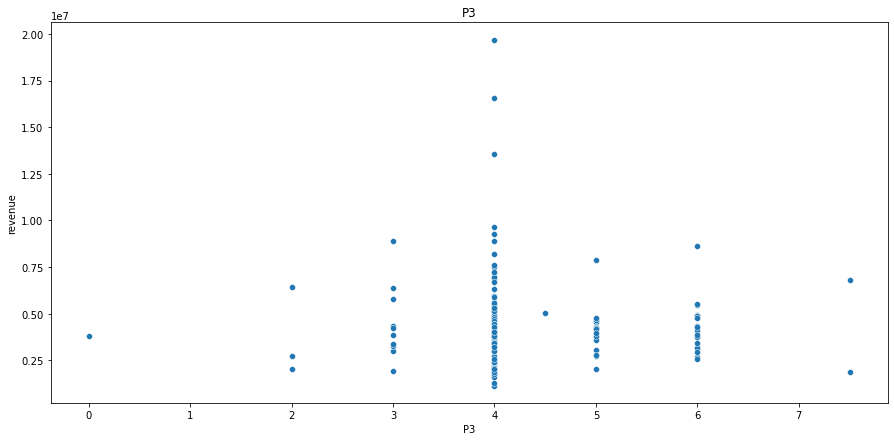

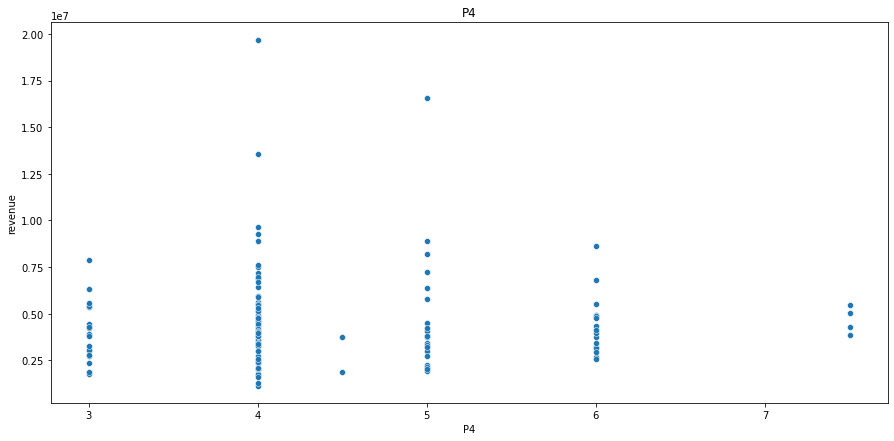

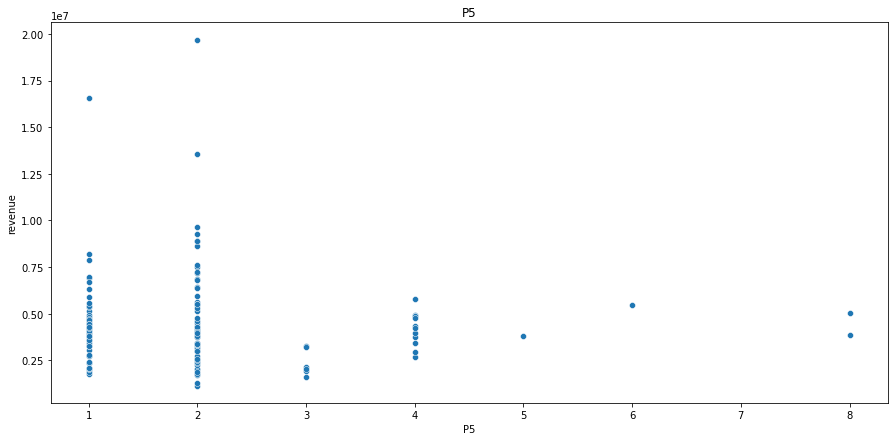

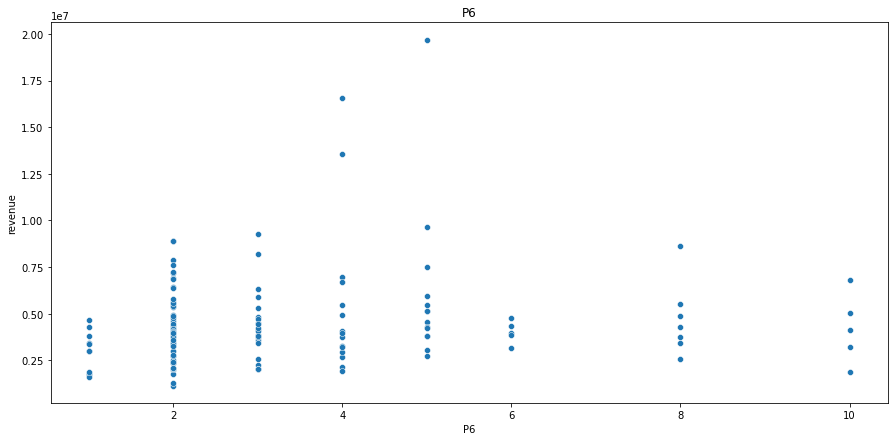

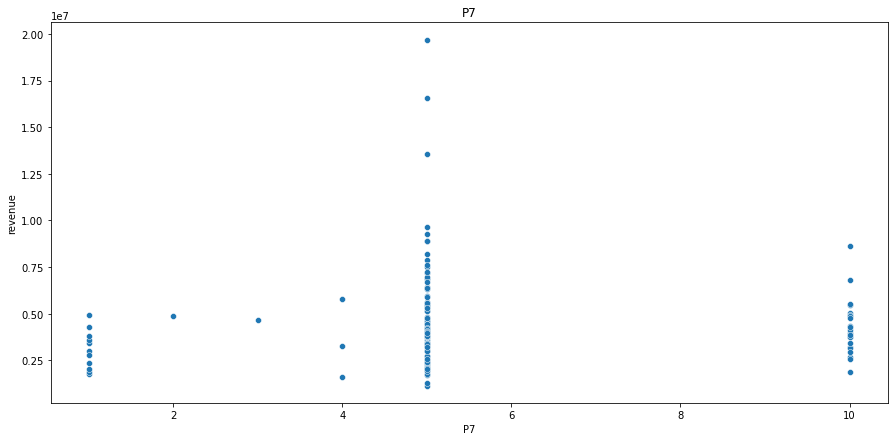

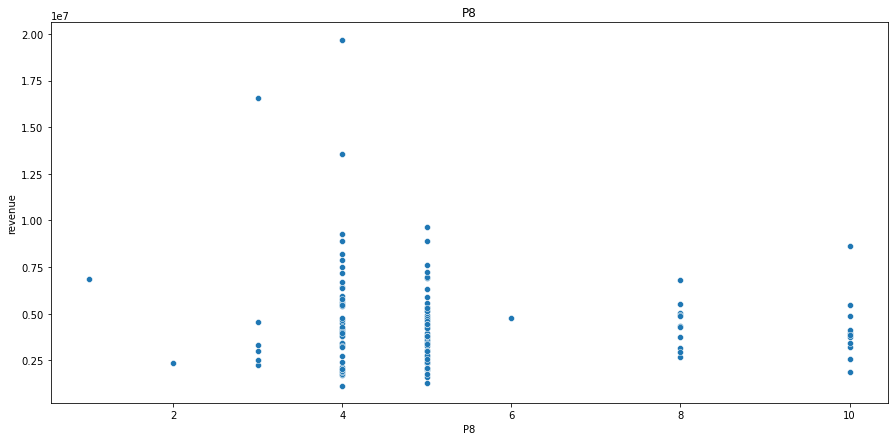

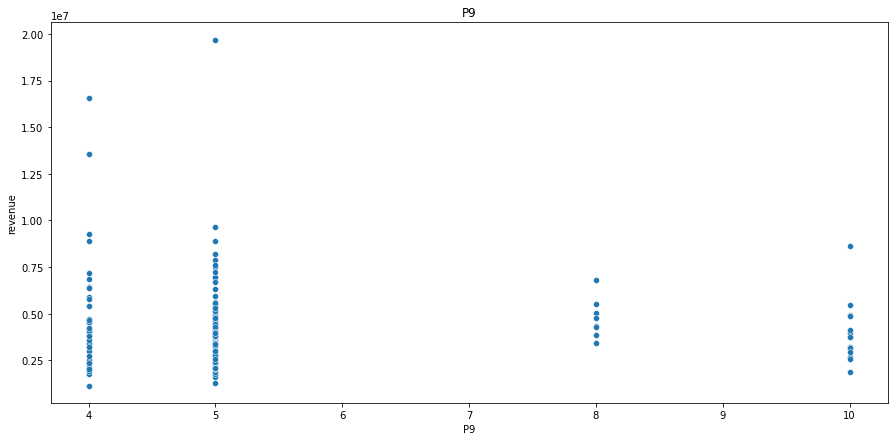

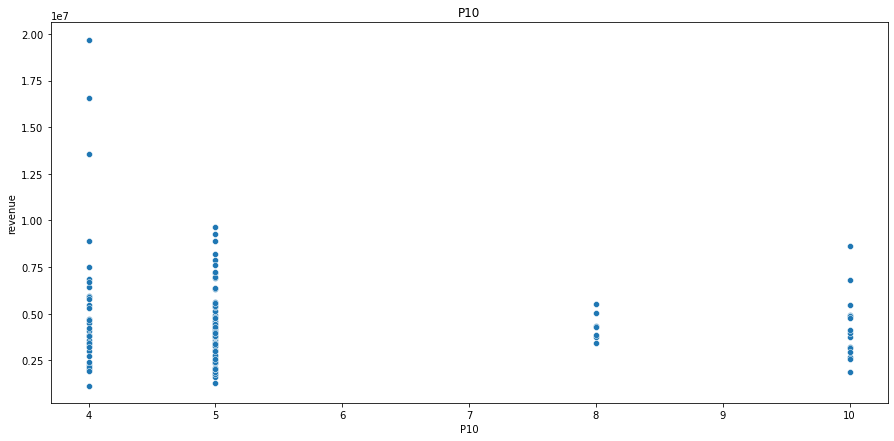

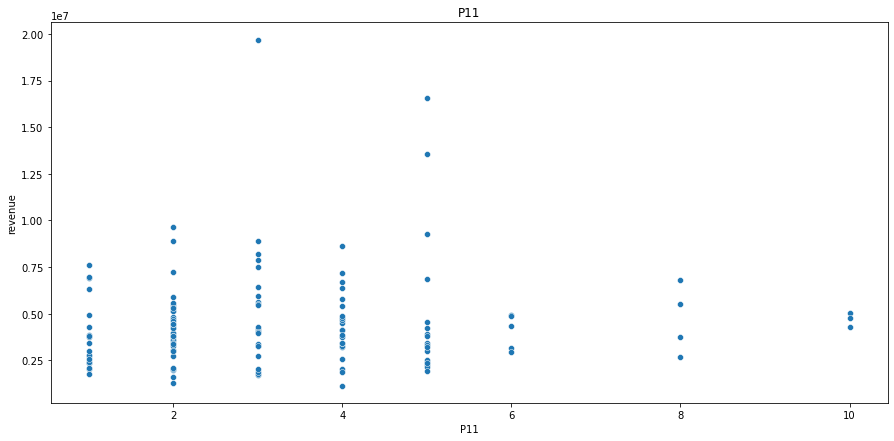

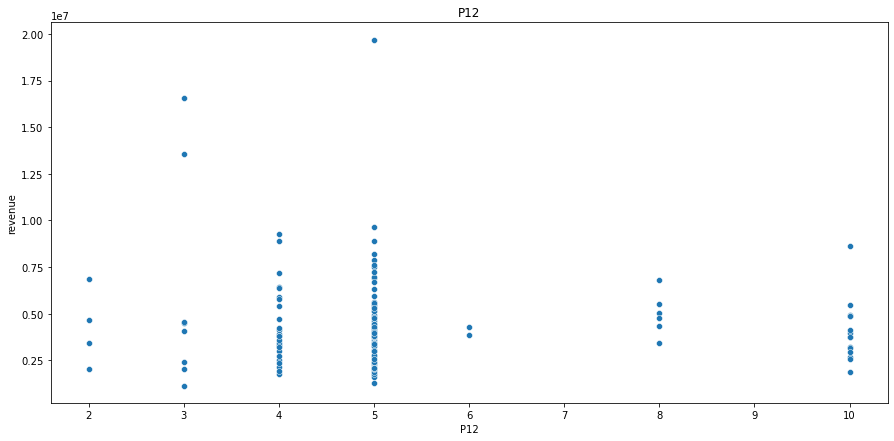

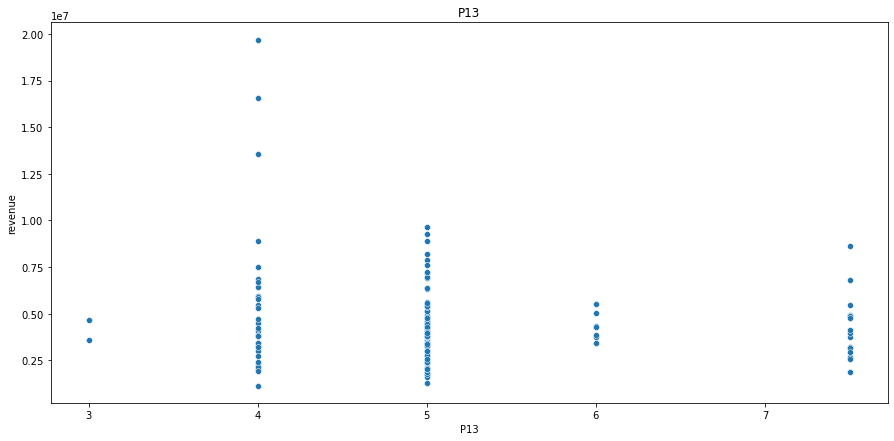

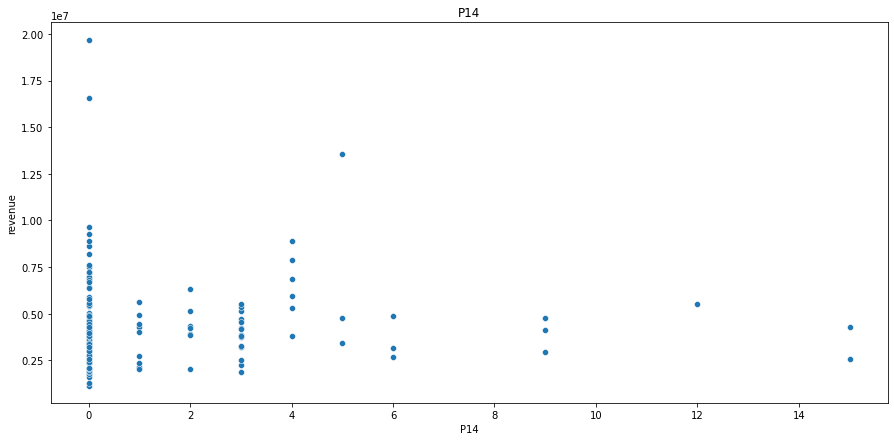

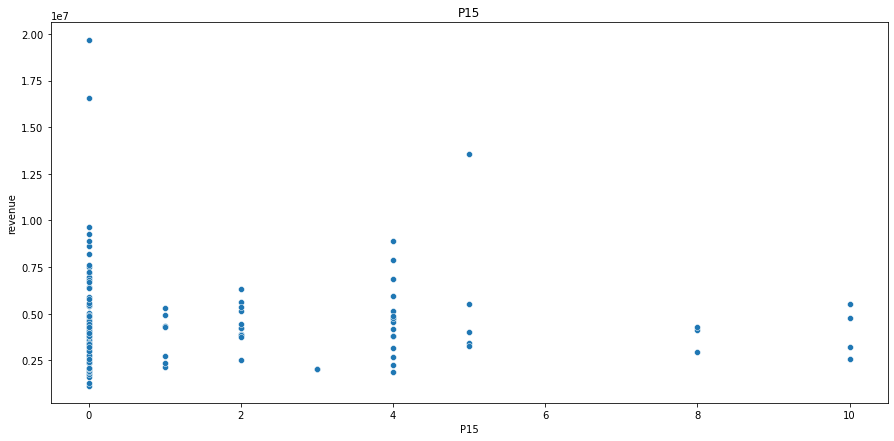

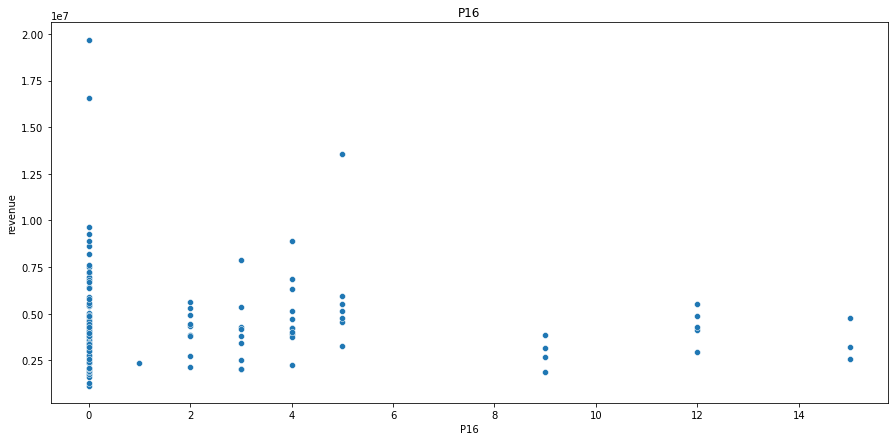

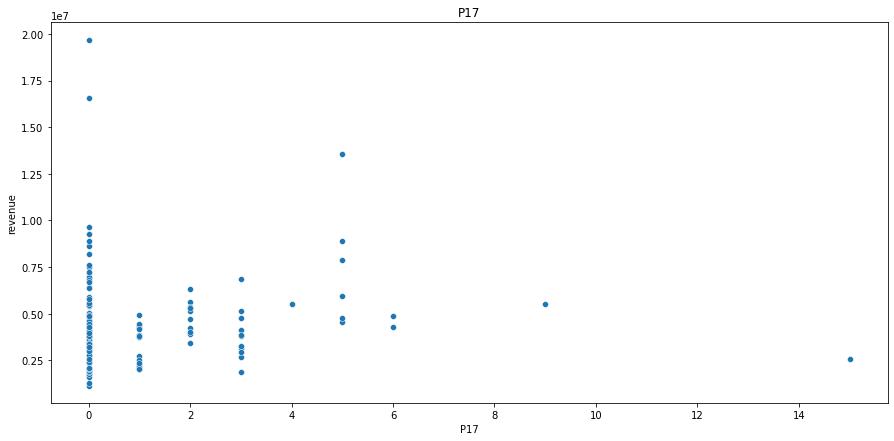

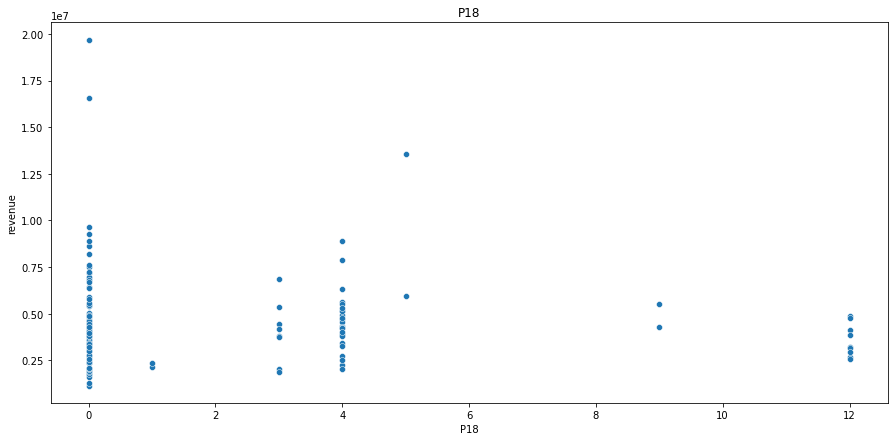

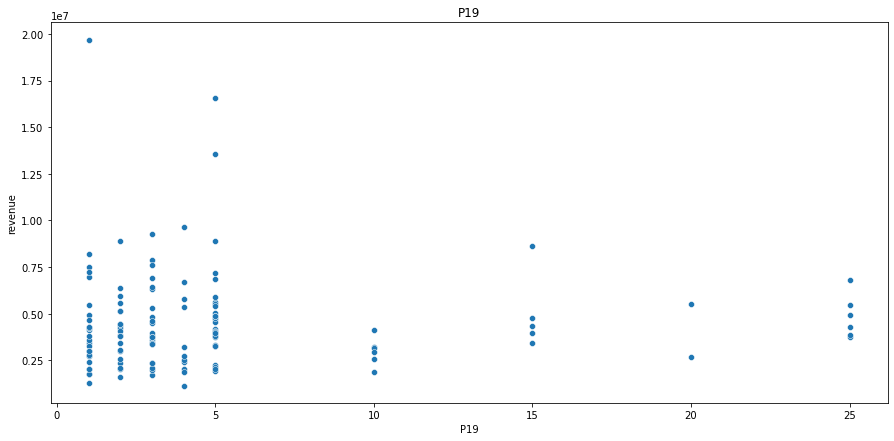

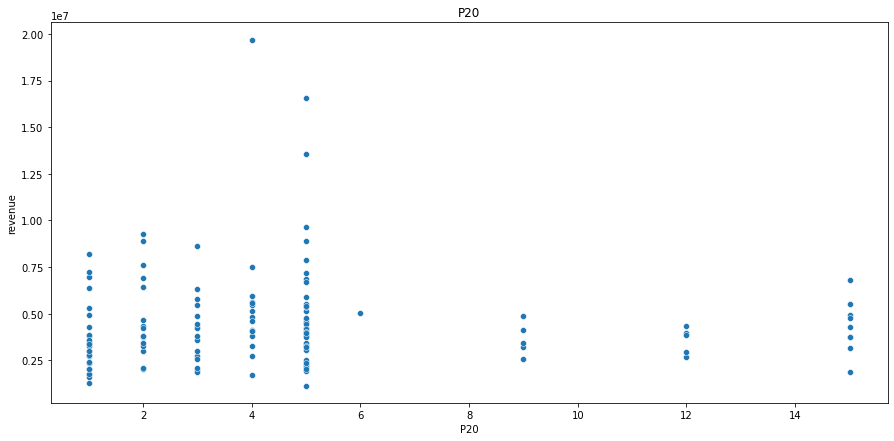

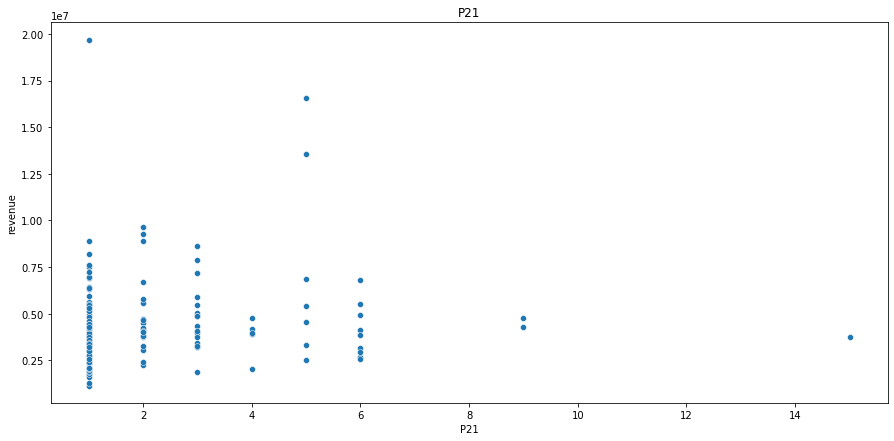

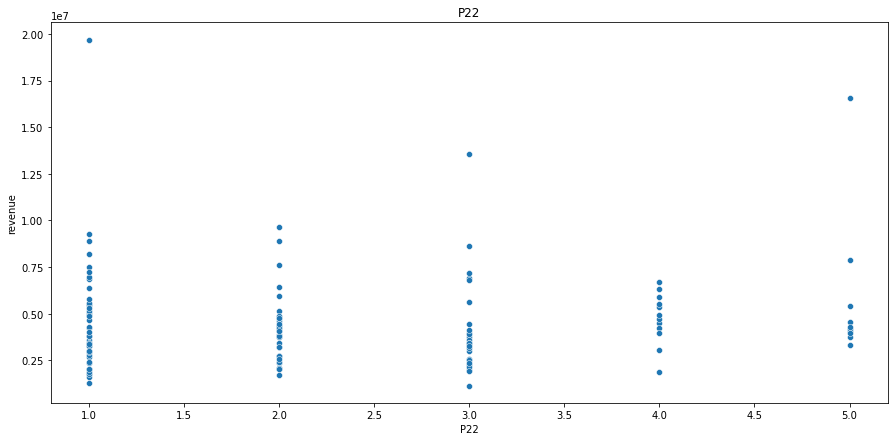

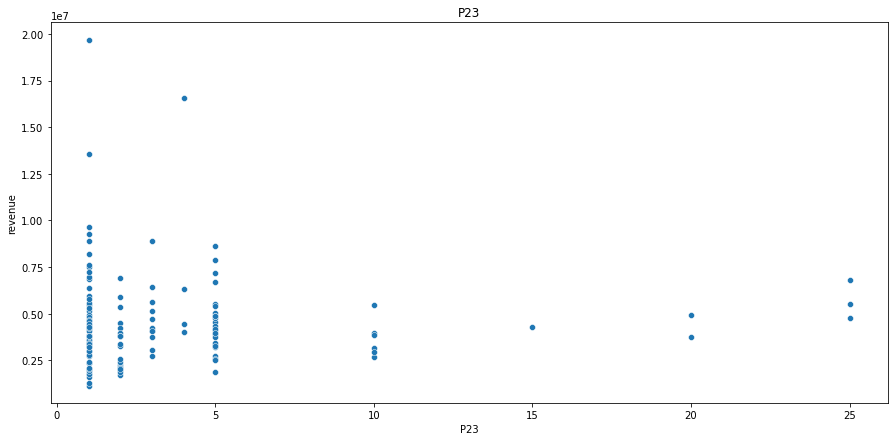

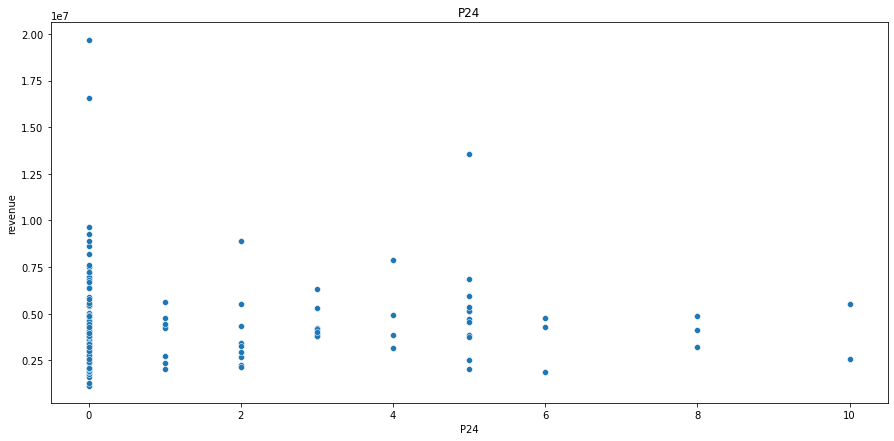

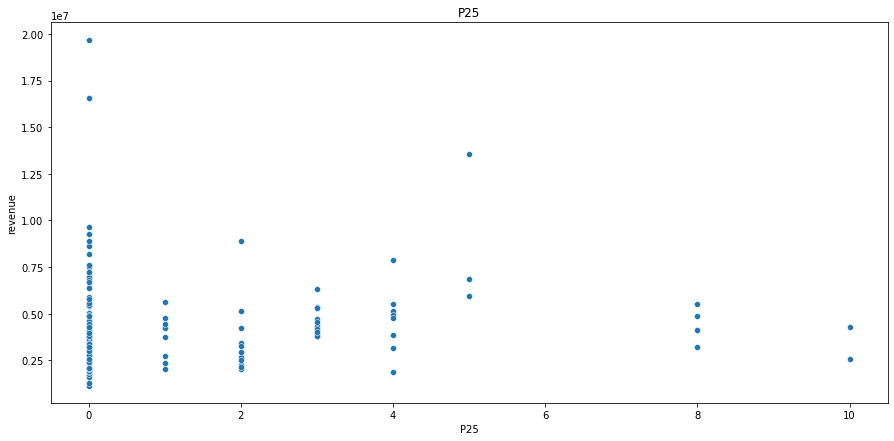

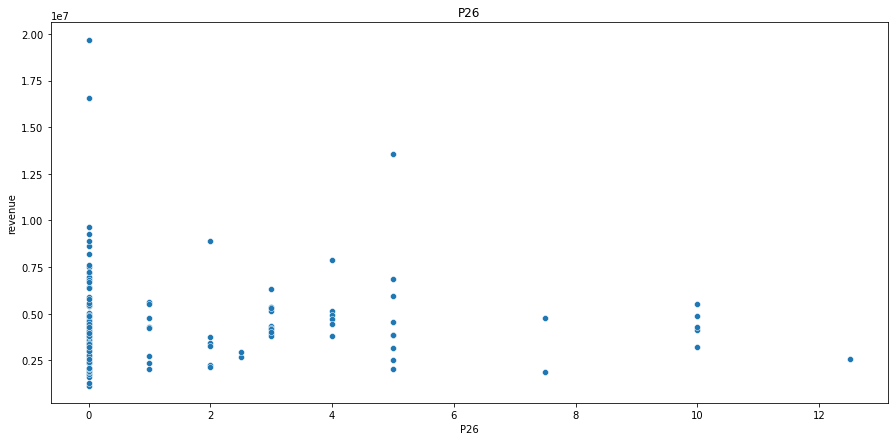

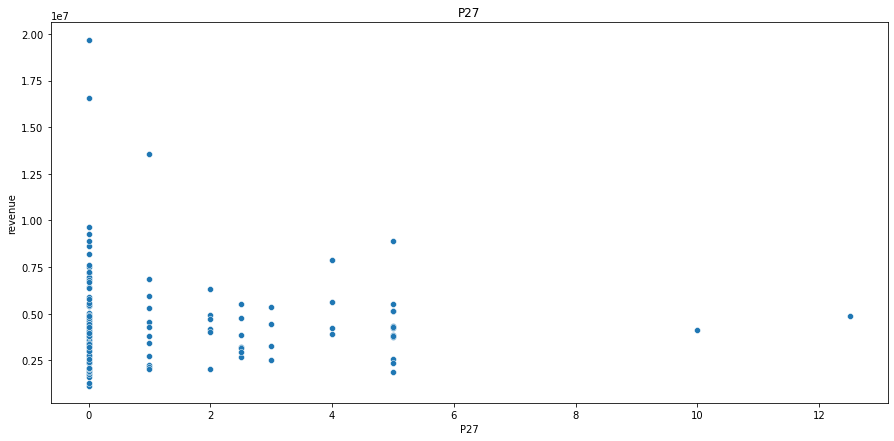

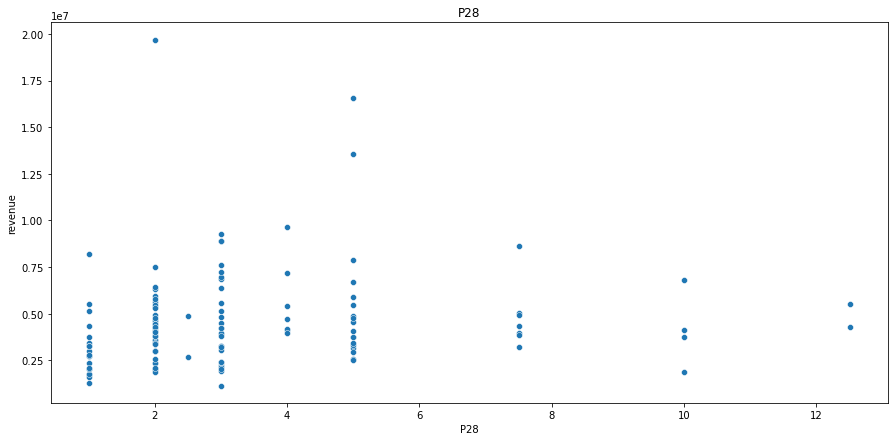

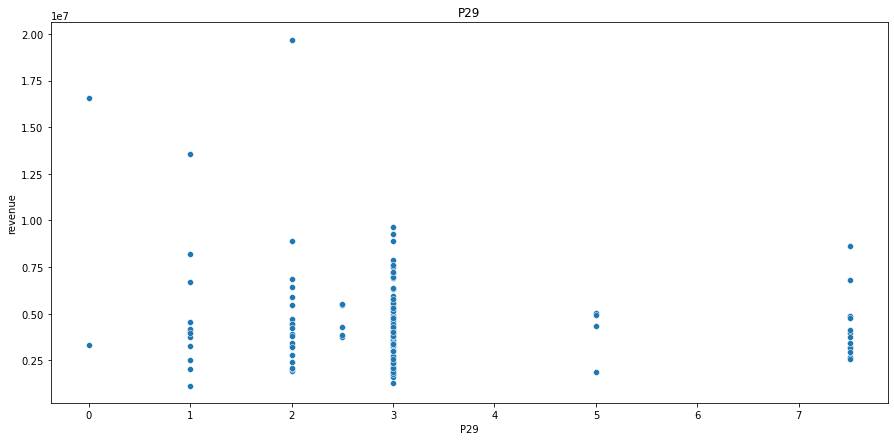

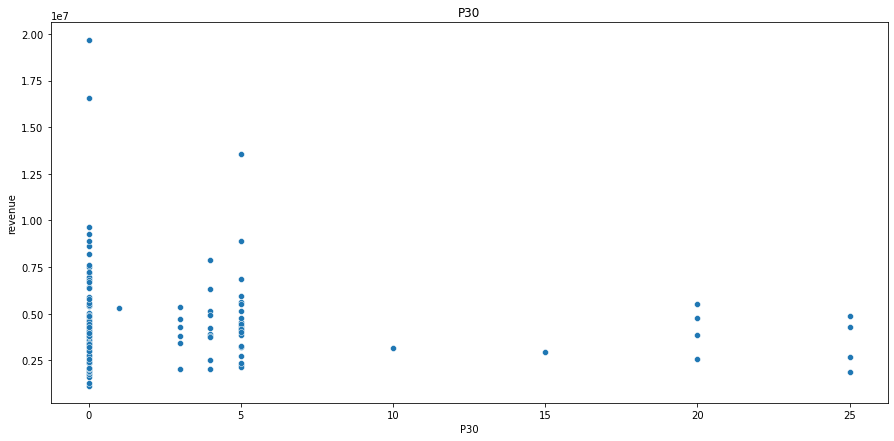

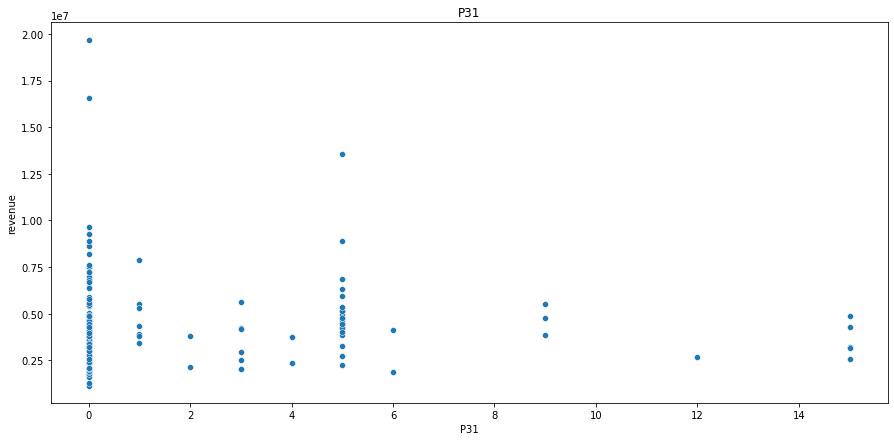

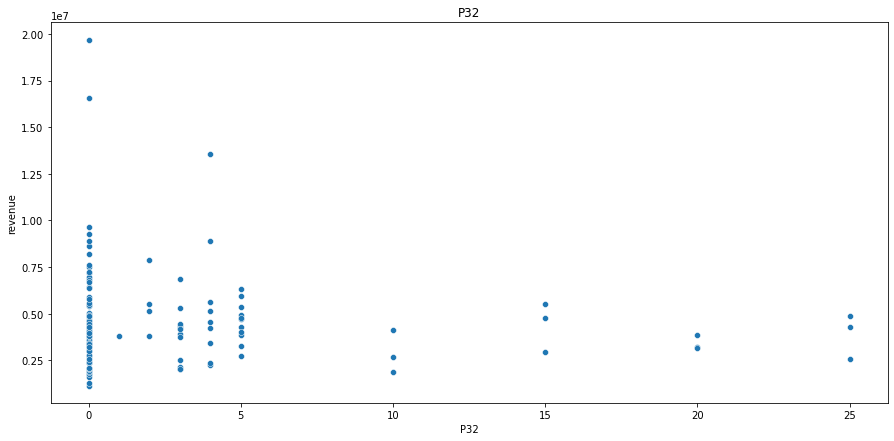

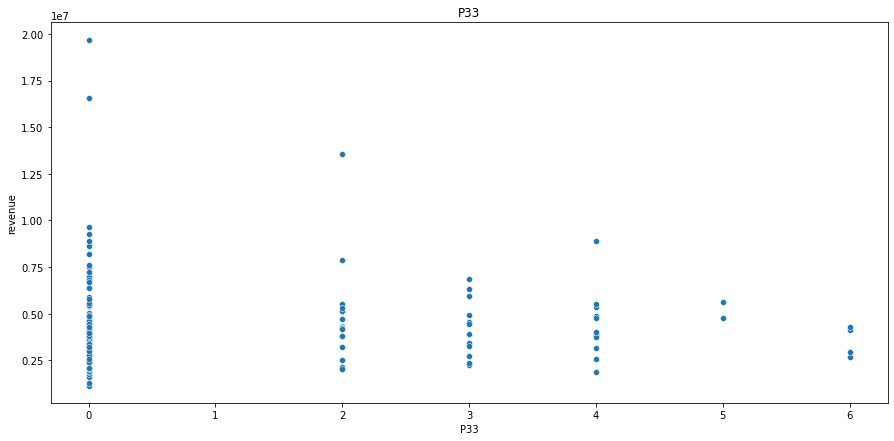

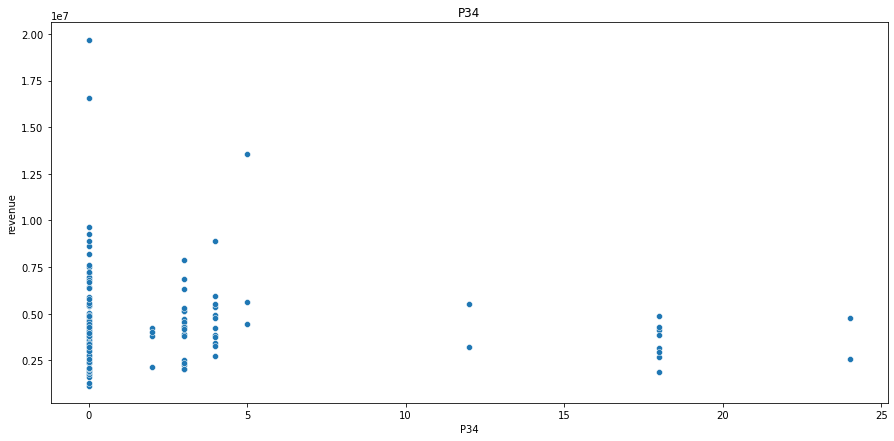

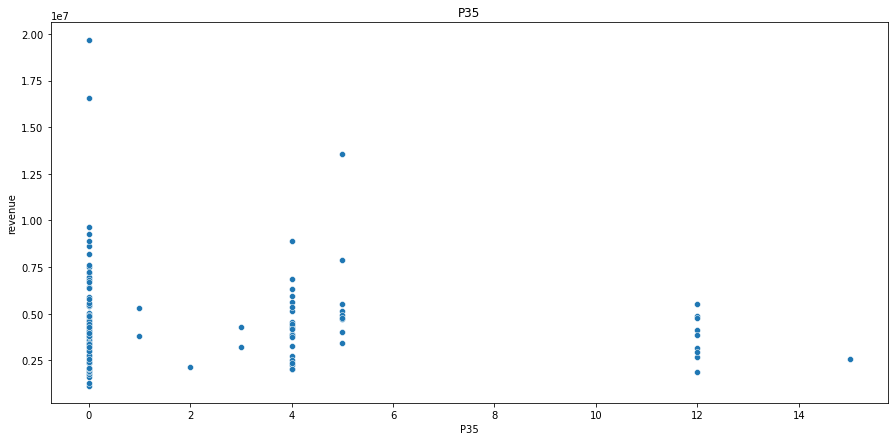

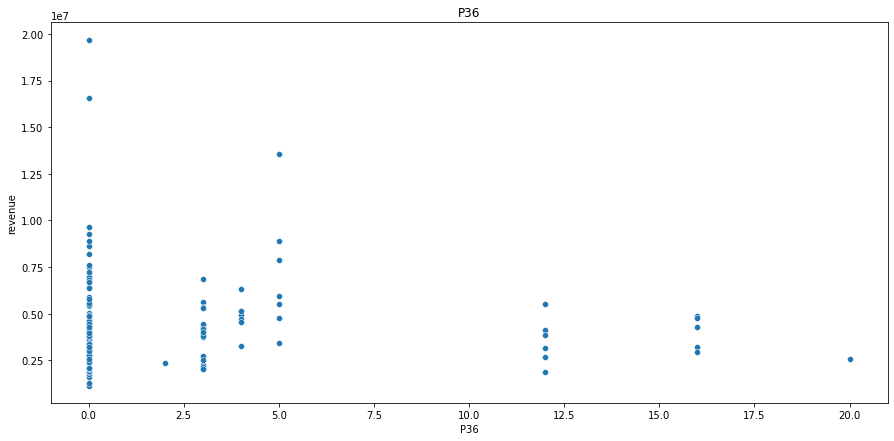

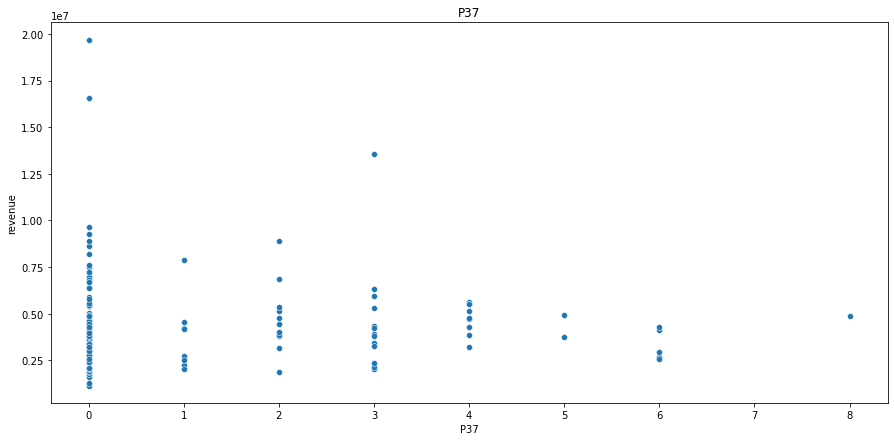

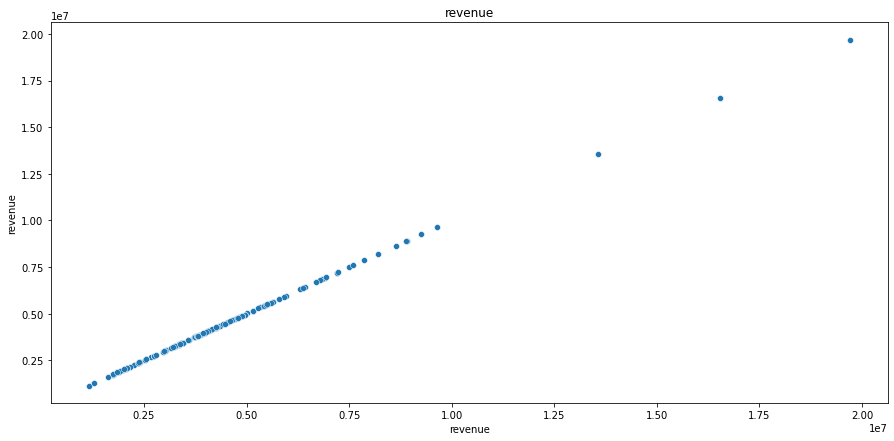

In [45]:
for i in cols_num:
    plt.figure(figsize = (15, 7))
    sns.scatterplot(data = data, x = i, y = "revenue")
    plt.title(i)
    plt.show()

### Bivariate Analysis

* P1, P2 - P37 seem to have a non-linear relationship with revenue. A linear model will hardly capture their correlation.

#### Categorical vs revenue

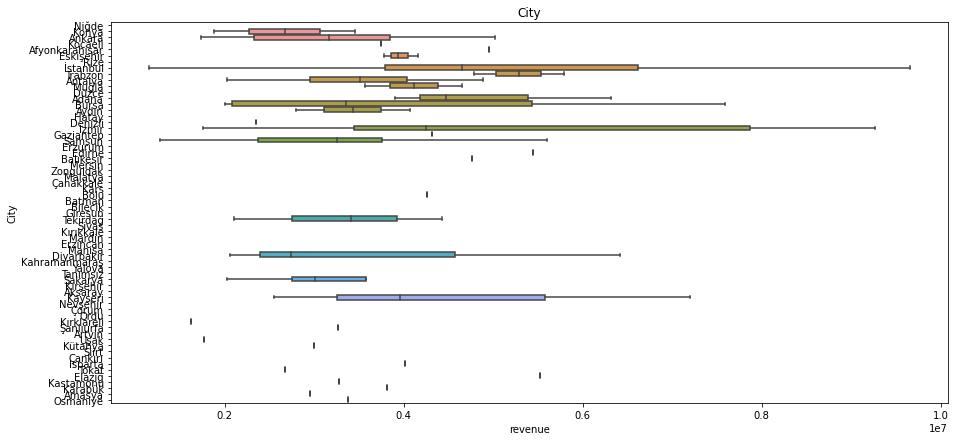

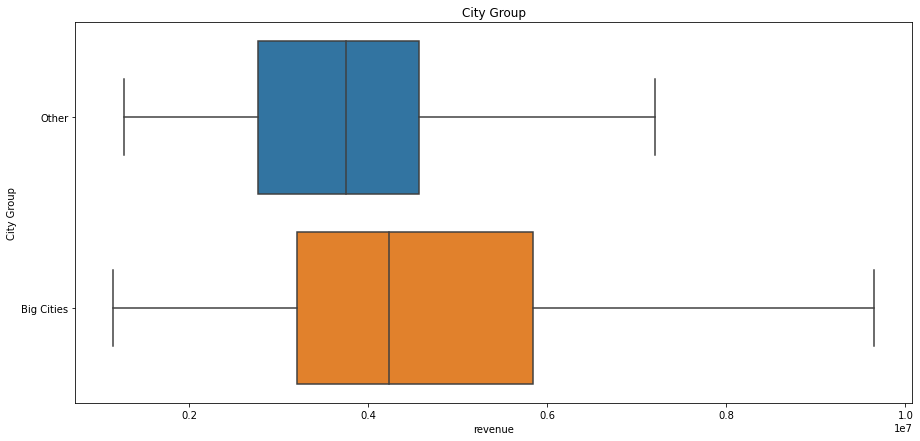

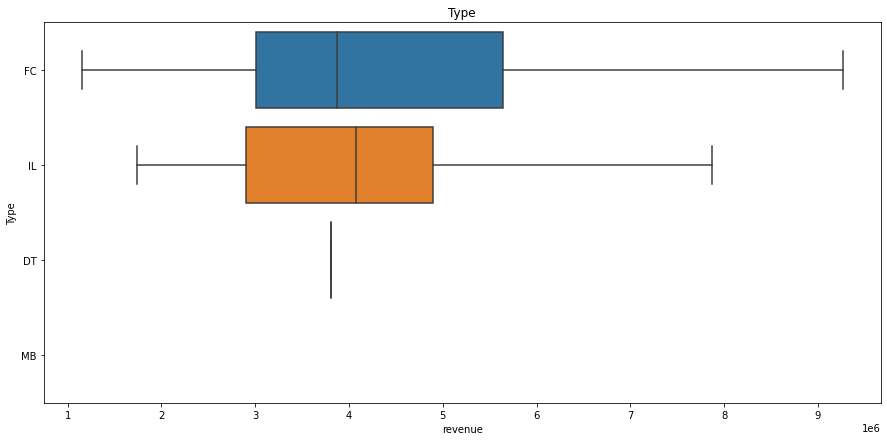

In [47]:
for i in cols_cat:
    plt.figure(figsize = (15, 7))
    sns.boxplot(data = data, x = "revenue", y = i, showfliers = False)
    plt.title(i)
    plt.show()